In [ ]:
library("forecast")

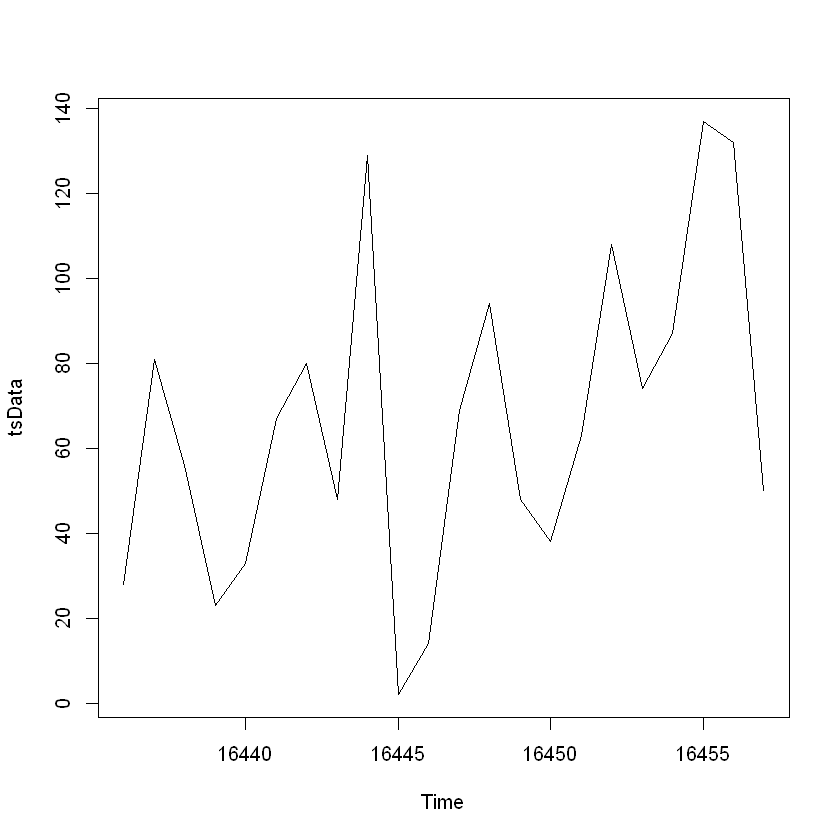

In [72]:
# # 加载数据
# tsData<-read.csv("D:\\projects\\datasets\\basexl.csv",header=T)
# # 转换为时序数据
# tsData<-ts(tsData$农业,start=tsData$年份[1])
# n<-length(tsData)

# 测试加载华为数据（半年）
tsData<-read.csv("..\\datasets\\weeksum.csv",header=T)
tsData$date=as.Date(tsData$date)
tsData<-ts(tsData$sale,start=tsData$date[1])
n<-length(tsData)
plot.ts(tsData)

In [35]:
head(tsData,5)

date,sale
2015/1/1,28
2015/1/8,81
2015/1/15,56
2015/1/22,23
2015/1/29,33


In [40]:
tsData$date=as.Date(tsData$date)
tsData<-ts(tsData$sale,start=tsData$date[1])
tsData

Time Series:
Start = 16436 
End = 16457 
Frequency = 1 
 [1]  28  81  56  23  33  67  80  48 129   2  14  69  94  48  38  63 108  74  87
[20] 137 132  50

ERROR: Error in tsData$date: $ operator is invalid for atomic vectors


In [73]:
# 此处预留十年数据作为检验
orgPred=tsData[(n-4):n]
tsData=tsData[1:(n-5)]

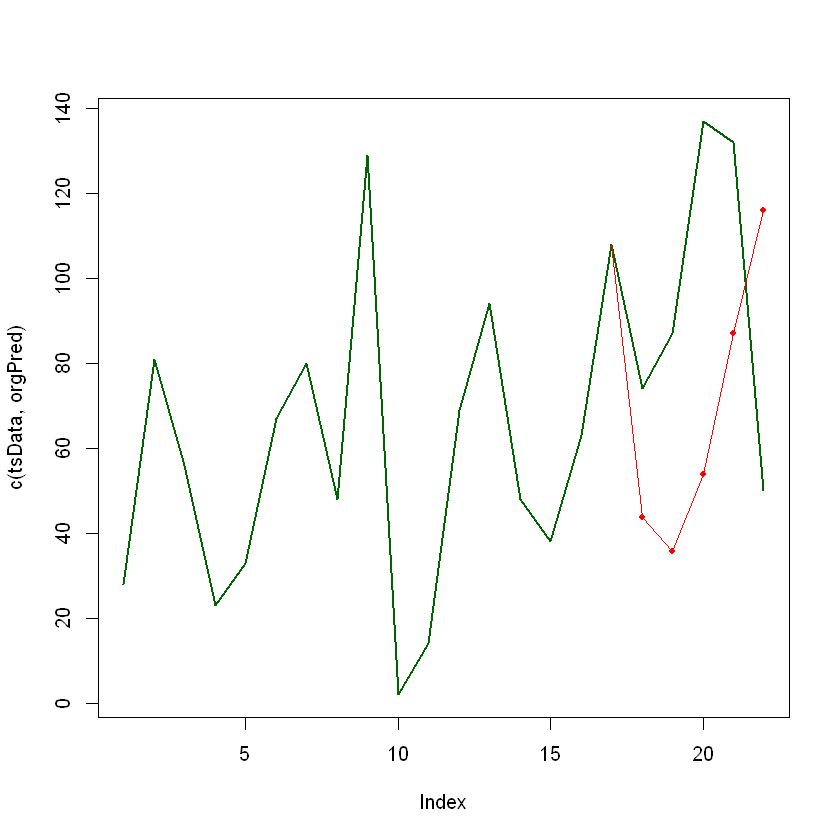

In [78]:
# 使用Arima方法
# 设置预测向量初始值
tsLen<-length(tsData)
preds<-NULL
newdata<-NULL
for(i in 1:5)
{
    ts0=c(tsData,newdata)
    arima.obj<-Arima(ts0,order=c(0,1,3))
    a=forecast(arima.obj,h=1)
    preds=c(preds,a$mean[1])
    newdata=orgPred[1:i]
}
plot(c(tsData,orgPred),type='l',col='darkgreen',lwd=2)
lines(tsLen:(tsLen+5),c(tsData[tsLen],preds),col='red')
points((tsLen+1):(tsLen+5),preds,col='red',pch=20)

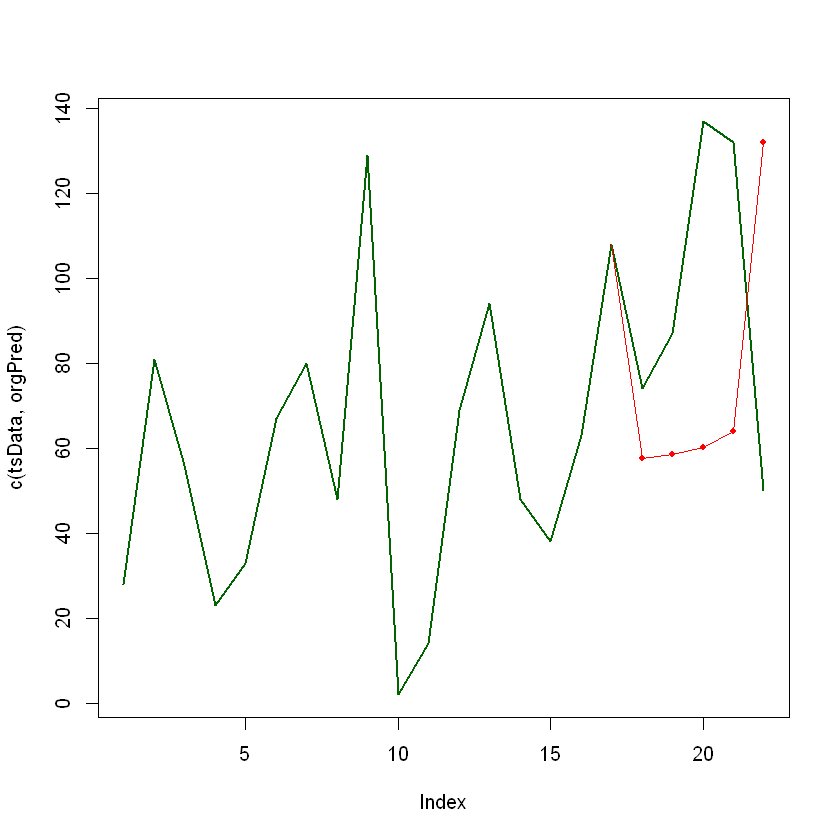

In [74]:
# 使用auto.arima方法
# 设置预测向量初始值
tsLen<-length(tsData)
preds<-NULL
newdata<-NULL
for(i in 1:5)
{
    ts0=c(tsData,newdata)
    arima.obj<-auto.arima(ts0)
    a=forecast(arima.obj,h=1)
    preds=c(preds,a$mean[1])
    newdata=orgPred[1:i]
}
plot(c(tsData,orgPred),type='l',col='darkgreen',lwd=2)
lines(tsLen:(tsLen+5),c(tsData[tsLen],preds),col='red')
points((tsLen+1):(tsLen+5),preds,col='red',pch=20)